In [1]:
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import urllib.request



[nltk_data] Downloading package punkt to /Users/rakeyser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeyser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rakeyser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
with open('data.json', 'r') as f:
    data_json = json.load(f)

In [3]:
data_list = data_json["data_list"]
stop_words = set(stopwords.words('english'))

# Text string separated by spaces, with stop words
concat_text_str = ' '.join(data_list).lower().split()

# Text list with non alpha filtered out, with stop words
concat_text_list = [word for word in concat_text_str if word.isalpha()]

# Text list with non alpha filtered out, with stop words removed
concat_text = [word for word in concat_text_str if word.isalpha() and word not in stop_words]

In [4]:
# Used for finding parts of speech words (nouns, verbs, adj, etc.) Very resource intensive, not recommended 
def extract_POS(texts, pos_type, top_n=100):
    
    nlp = spacy.load("en_core_web_sm")
    pos_list = []

    for text in texts:
        text = text.lower()
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
        text = " ".join(filtered_text)

        doc = nlp(text)
        
        for token in doc:
            if token.pos_ == pos_type:
                pos_list.append(token.text)

    most_common_pos = [word for word, word_count in Counter(pos_list).most_common(top_n)]

    return most_common_pos

# print("running nouns")
#nouns = extract_POS(data_list, "NOUN", 100)
# print(nouns)
# adjectives = extract_POS(data_list, "ADJ", 100)
# print(adjectives)
# verbs = extract_POS(data_list, "VERB", 100)
# print(verbs)

In [5]:
# print(nouns)
# print(adjectives)
# print(verbs)

In [6]:
def Sort(tuple): 
    tuple.sort(key = lambda a: a[1], reverse = True) 
    return tuple 

def count_word_occurrences(text):
    tuples = []
    unique_words = set(text)
    for word in unique_words:
        count = text.count(word)
        tuples.append((word, count))

    tuples = tuples[:100]

    sorted_tuples = Sort(tuples)
    return sorted_tuples

def count_word_occurrences_unsorted(text):
    word_list = text.split(" ")
    tuples = []
    unique_words = set(word_list)

    for word in unique_words:
        count = word_list.count(word)
        tuples.append((word, count))

    tuples = tuples[:100]
    return tuples

def word_counts(word_list):
    word_counter = Counter(word_list)
    word_counts = list(word_counter.items())

    if len(word_counts) > 100:
        word_counts = word_counts[:100]
    
    sorted_tuples = Sort(word_counts)
    return sorted_tuples

def noun_filter(filtered_words):
    pos_words = pos_tag(filtered_words)
    nouns = [word for word, pos in pos_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    most_common_nouns = Counter(nouns).most_common(100)

    return most_common_nouns

# Create a word cloud from a list of words
def create_word_cloud(words):
    word_frequencies = Counter(words)
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_frequencies)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Create a round word cloud from a provided tuple of words and instances
def create_word_cloud_tuple(tuple_list):
    word_freq_dict = dict(tuple_list)

    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wordcloud = WordCloud(width=1920, height=1080, max_words=100, background_color='white', mask=mask, colormap="magma", relative_scaling=.75)
    wordcloud.generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [7]:
occurences_list = word_counts(concat_text_list)
occurences = word_counts(concat_text)

In [9]:
noun_list = noun_filter(concat_text)

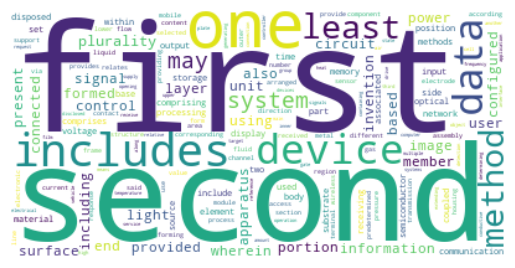

In [10]:
create_word_cloud(concat_text)

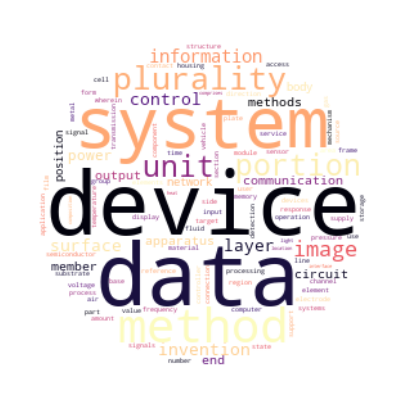

In [11]:
create_word_cloud_tuple(noun_list)